<a href="https://colab.research.google.com/github/Almaududy/IPAN-CAP0447/blob/main/IPAN_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.5.0


In [4]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from upstream
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [01:34<00:00, 57.7MB/s]
100% 3.24G/3.24G [01:34<00:00, 36.9MB/s]


In [8]:
# Unzip dataset into a folder
!unzip a-large-scale-fish-dataset.zip -d tmp

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: tmp/Fish_Dataset/Fish_Dataset/S

In [30]:
DataDir = '/content/tmp/Fish_Dataset/Fish_Dataset'
os.listdir(DataDir)

CATEGORIES = []
for list_ in os.listdir(DataDir):
    if '.' in list_:
        CATEGORIES.append("/content/tmp/Fish_Dataset/Fish_Dataset/{}".format(list_))

print(CATEGORIES)

['/content/tmp/Fish_Dataset/Fish_Dataset/license.txt', '/content/tmp/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m']


In [35]:
import os
myfile="/content/tmp/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m"

## If file exists, delete it ##
if os.path.isfile(myfile):
    os.remove(myfile)
else:    ## Show an error ##
    print("Error: %s file not found" % myfile)

In [4]:
DataDir = '/content/tmp/Fish_Dataset/Fish_Dataset'
os.listdir(DataDir)

['Shrimp',
 'Black Sea Sprat',
 'Gilt-Head Bream',
 'Red Sea Bream',
 'Red Mullet',
 'Sea Bass',
 'Trout',
 'Hourse Mackerel',
 'Striped Red Mullet']

In [5]:
from pathlib import Path
train_path = Path('/content/tmp/Fish_Dataset/Fish_Dataset')
train_path.glob(r'**/*.png')

<generator object Path.glob at 0x7ffb4a39e050>

In [6]:
filepath = list(train_path.glob(r'**/*.png'))
len(filepath)

18000

In [7]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepath))
len(Labels)

18000

In [8]:
df = pd.concat([pd.Series(filepath).astype(str), pd.Series(Labels)], axis=1)
df.columns = ['Images', 'Image_label']

In [9]:
df = df[df['Image_label'].apply(lambda x: x[-2:] != 'GT')]  #removing
df = df.sample(frac = 1).reset_index(drop=True)
print(df.shape)
df['Image_label'].value_counts(ascending=True)

(9000, 2)


Shrimp                1000
Sea Bass              1000
Trout                 1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Striped Red Mullet    1000
Hourse Mackerel       1000
Black Sea Sprat       1000
Red Mullet            1000
Name: Image_label, dtype: int64

In [10]:
df

,Images,Image_label
0,/content/tmp/Fish_Dataset/Fish_Dataset/Red Sea...,Red Sea Bream
1,/content/tmp/Fish_Dataset/Fish_Dataset/Gilt-He...,Gilt-Head Bream
2,/content/tmp/Fish_Dataset/Fish_Dataset/Shrimp/...,Shrimp
3,/content/tmp/Fish_Dataset/Fish_Dataset/Striped...,Striped Red Mullet
4,/content/tmp/Fish_Dataset/Fish_Dataset/Striped...,Striped Red Mullet
...,...,...
8995,/content/tmp/Fish_Dataset/Fish_Dataset/Sea Bas...,Sea Bass
8996,/content/tmp/Fish_Dataset/Fish_Dataset/Red Mul...,Red Mullet
8997,/content/tmp/Fish_Dataset/Fish_Dataset/Gilt-He...,Gilt-Head Bream
8998,/content/tmp/Fish_Dataset/Fish_Dataset/Sea Bas...,Sea Bass


In [11]:
from sklearn.model_selection import train_test_split

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10


x_train, x_test = train_test_split(df, test_size=1 - train_ratio)
x_val, x_test = train_test_split(x_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(f'Shape of Training Data : ',x_train.shape)
print(f'Shape of Testing Data : ',x_test.shape)
print(f'Shape of Validation Data : ',x_val.shape)
x_testt = x_test.copy()

Shape of Training Data :  (7200, 2)
Shape of Testing Data :  (900, 2)
Shape of Validation Data :  (900, 2)


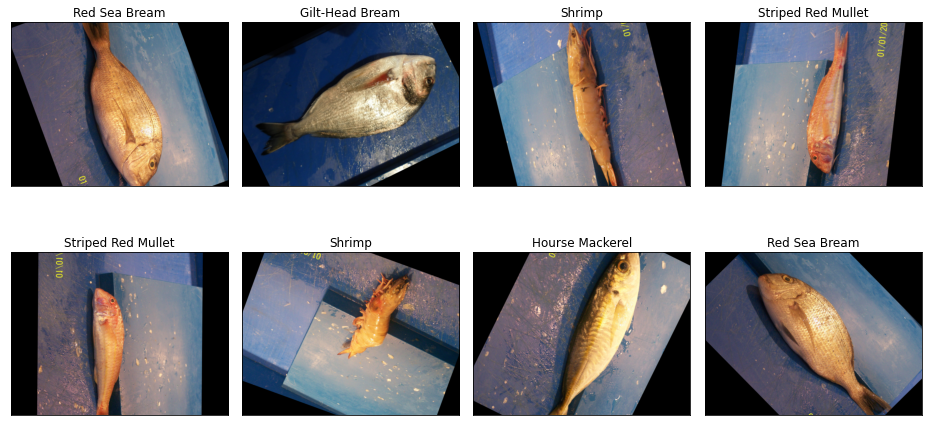

In [24]:
# Showing 8 Images 
import matplotlib.pyplot as plt

f,a = plt.subplots(nrows=2, ncols=4, figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Images[i]))
    ax.set_title(df.Image_label[i])
    
plt.tight_layout()
plt.show()

In [ ]:
rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True, 
    vertical_flip =True,
    fill_mode = 'nearest')

In [37]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

input = (180,180)

img_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

TRAIN_GENERATOR = img_datagen.flow_from_dataframe(
    dataframe = x_train,
    x_col = 'Images', 
    y_col ='Image_label',
    target_size = input, 
    batch_size = 180,
    color_mode='rgb', 
    class_mode = 'categorical', 
    shuffle = True)

VAL_GENERATOR = img_datagen.flow_from_dataframe(
    dataframe = x_val, 
    target_size=input, 
    x_col = 'Images', 
    y_col ='Image_label', 
    color_mode='rgb',
    class_mode='categorical',
    batch_size= 180, 
    shuffle=True)

TEST_GENERATOR = img_datagen.flow_from_dataframe(
    dataframe = x_test,
    target_size = (input,input), 
    x_col = 'Images', 
    y_col ='Image_label',
    color_mode='rgb',
    class_mode = 'categorical',
    batch_size = 180, 
    shuffle = False)

Found 7200 validated image filenames belonging to 9 classes.
Found 900 validated image filenames belonging to 9 classes.
Found 900 validated image filenames belonging to 9 classes.


In [15]:
TRAIN_GENERATOR.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import InputLayer, Input, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Activation, MaxPool2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model, Sequential

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(128,(3,3), padding='same', input_shape=(180, 180, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 180, 180, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [31]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [47]:

from tensorflow.keras.callbacks import Callback, ModelCheckpoint, TensorBoard, EarlyStopping

# Load the TensorBoard notebook extension
%reload_ext tensorboard

import datetime
from time import time
log_dir = "logs/fit/"+ '_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                   histogram_freq=1)
# Clear any logs from previous runs
!rm -rf ./logs/

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999) | (logs.get('loss') <= 0.01)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True
            
end_callback = myCallback()

checkpoints = ModelCheckpoint("model_weight.h5", 
                               monitor='val_accuracy', 
                               verbose=1, 
                               save_best_only=True, 
                               save_weights_only=False, 
                               mode='auto', 
                               save_freq='epoch')

early_stopping = EarlyStopping(monitor='val_accuracy', 
                               min_delta=0, 
                               patience=10, 
                               verbose=1, 
                               mode='auto',
                               restore_best_weights=True,)

callbacks= [end_callback, tensorboard_callback, early_stopping, checkpoints]

start=time()

print("Model training time = "+str(time()-start))

Model training time = 5.7220458984375e-05


In [48]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [49]:
EPOCHS = 50

history = model.fit(TRAIN_GENERATOR,
                     epochs=EPOCHS,
                     steps_per_epoch=20,
                     callbacks=callbacks,
                     validation_data = VAL_GENERATOR,
                     validation_steps=5,
                     verbose = 1)


Epoch 1/50
20/20 [==============================] - 283s 14s/step - loss: 0.6816 - accuracy: 0.8156 - val_loss: 0.3679 - val_accuracy: 0.8756

Epoch 00001: val_accuracy improved from -inf to 0.87556, saving model to model_weight.h5
Epoch 2/50
20/20 [==============================] - 283s 14s/step - loss: 0.2690 - accuracy: 0.9078 - val_loss: 0.3764 - val_accuracy: 0.8467

Epoch 00002: val_accuracy did not improve from 0.87556
Epoch 3/50
20/20 [==============================] - 280s 14s/step - loss: 0.3425 - accuracy: 0.8944 - val_loss: 0.3659 - val_accuracy: 0.8667

Epoch 00003: val_accuracy did not improve from 0.87556
Epoch 4/50
20/20 [==============================] - 282s 14s/step - loss: 0.2251 - accuracy: 0.9272 - val_loss: 0.1811 - val_accuracy: 0.9400

Epoch 00004: val_accuracy improved from 0.87556 to 0.94000, saving model to model_weight.h5
Epoch 5/50
20/20 [==============================] - 280s 14s/step - loss: 0.1687 - accuracy: 0.9450 - val_loss: 0.3715 - val_accuracy: 0.

In [50]:
model.save('IPAN_model.h5')

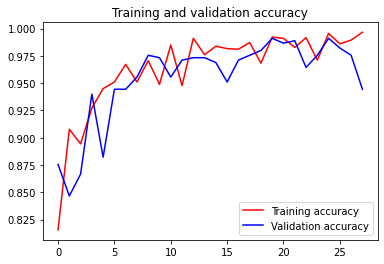

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()